In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
from cartopy.mpl.ticker import LatitudeFormatter, LongitudeFormatter
from conaf_func import *
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams.update({
    "font.family": "serif",
})
matplotlib.rcParams["text.usetex"] = True

# PLOTING IN MAP

In [22]:
data = {
    "latitude": [-39, -37, -40, 0],
    "longitude": [-73, -72, -71, 70]
}
df = pd.DataFrame(data)

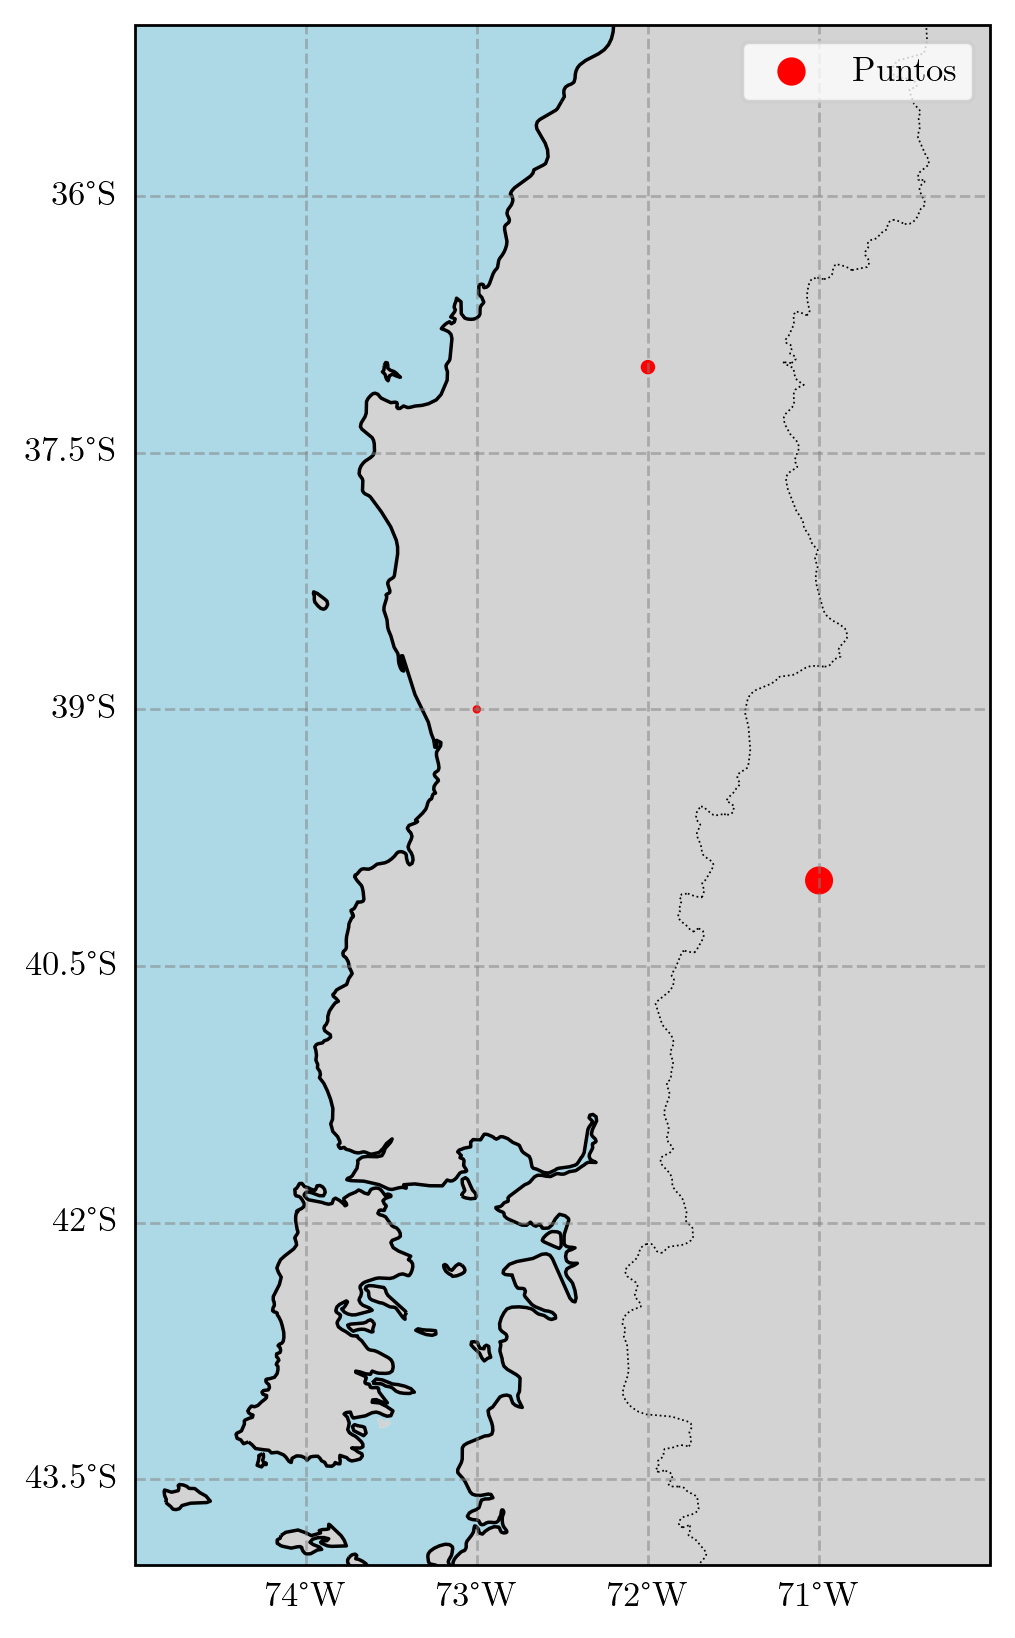

In [27]:
# Coordenadas de la zona sur de Chile
min_lon, max_lon = -75, -70  # Límites de longitud
min_lat, max_lat = -44, -35  # Límites de latitud

# Crear figura y ejes con proyección
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, dpi=250, figsize=(5,8))

# Configurar límites del mapa según los puntos dados
ax.set_extent([min_lon, max_lon, min_lat, max_lat], crs=ccrs.PlateCarree())

# Añadir características al mapa
ax.add_feature(cfeature.COASTLINE, linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.5)
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

# plot scatter
ax.scatter(
    df["longitude"], df["latitude"],
    color='red', s=[2, 10, 50, 100], transform=ccrs.PlateCarree(), label='Puntos'
)

# Opcional: Añadir líneas de grilla para latitudes y longitudes
gl = ax.gridlines(draw_labels=True, color="gray", alpha=0.5, linestyle="--")
gl.top_labels = False
gl.right_labels = False

# Usar formateadores para mostrar valores en formato decimal
ax.xaxis.set_major_formatter(LongitudeFormatter(degree_symbol=''))
ax.yaxis.set_major_formatter(LatitudeFormatter(degree_symbol=''))

plt.legend(loc="upper right")

plt.show()


# PLOTING WITH REAL DATA

In [2]:
regiones_ordenadas = [
    'Arica y Parinacota',
    'Tarapacá',
    'Antofagasta',
    'Atacama',
    'Coquimbo',
    'Valparaíso',
    'Metropolitana',
    "O'Higgins",
    'Maule',
    'Ñuble',
    'Biobío',
    'Araucanía',
    'Los Ríos',
    'Los Lagos',
    'Aysén',
    'Magallanes'
]

In [3]:
file = "Base de datos_IIFF_2009_2018.xlsx"
excel_file = pd.ExcelFile(file)
sheets = excel_file.sheet_names
DFS = [pd.read_excel(excel_file, sheet_name=s) for s in sheets]
df = pd.concat(DFS)
df.dropna(inplace=True)
df["dLat"] = df["Lat"].apply(lambda x: dms_to_decimal(x))
df["dLon"] = df["Lon"].apply(lambda x: dms_to_decimal(x))

In [4]:
min_lat_chile, max_lat_chile = -56, -16
min_lon_chile, max_lon_chile = -76, -67

df_chile = df[(df["dLat"] < max_lat_chile) & (df["dLat"] > min_lat_chile)]

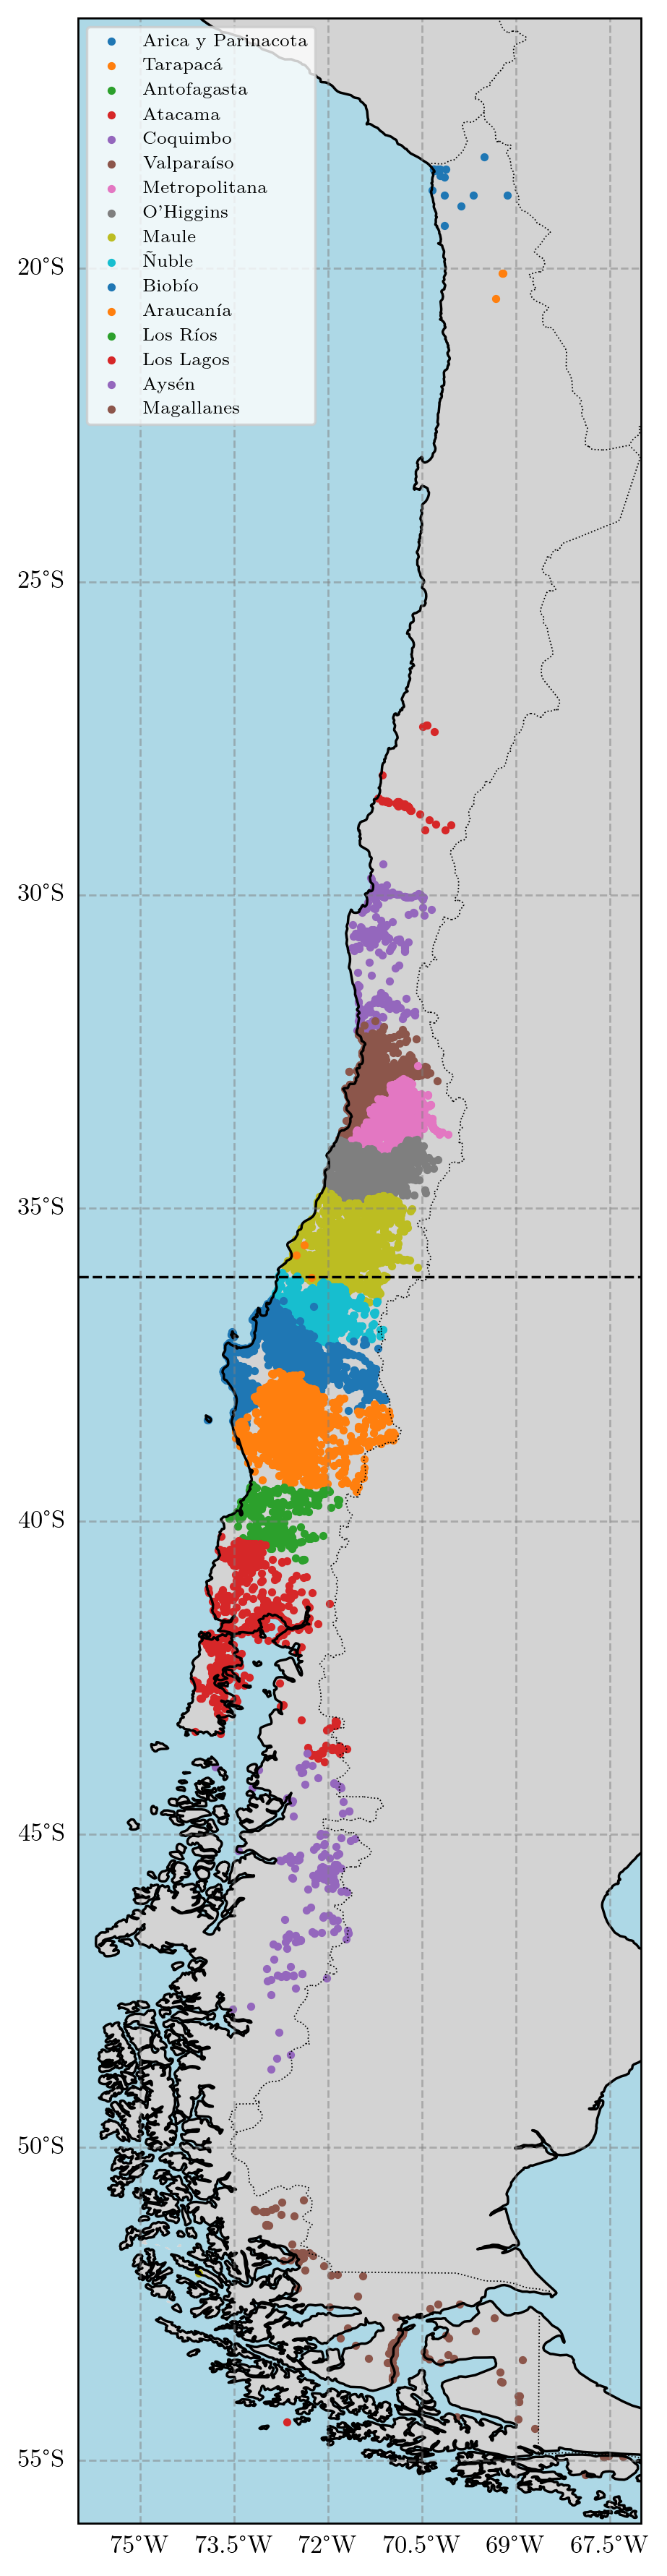

In [10]:
# Coordenadas de la zona sur de Chile
min_lon, max_lon = min_lon_chile, max_lon_chile  # Límites de longitud
min_lat, max_lat = min_lat_chile, max_lat_chile  # Límites de latitud

# Crear figura y ejes con proyección
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, dpi=250, figsize=(5,18))
ax.plot([-80, -65], [-36.1, -36.1], color='black', linestyle="--", linewidth=1, transform=ccrs.PlateCarree())

# Configurar límites del mapa según los puntos dados
ax.set_extent([min_lon, max_lon, min_lat, max_lat], crs=ccrs.PlateCarree())

# Añadir características al mapa
ax.add_feature(cfeature.COASTLINE, linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.5)
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

# plot scatter
for region in regiones_ordenadas:
    df_ = df_chile[df_chile["Región"] == region]
    ax.scatter(
        df_["dLon"], df_["dLat"], s=5, transform=ccrs.PlateCarree(), label=region
    )

# Opcional: Añadir líneas de grilla para latitudes y longitudes
gl = ax.gridlines(draw_labels=True, color="gray", alpha=0.5, linestyle="--")
gl.top_labels = False
gl.right_labels = False

plt.legend(loc="upper left", fontsize=7)
plt.savefig("chilean_fires_spots.png")

plt.show()


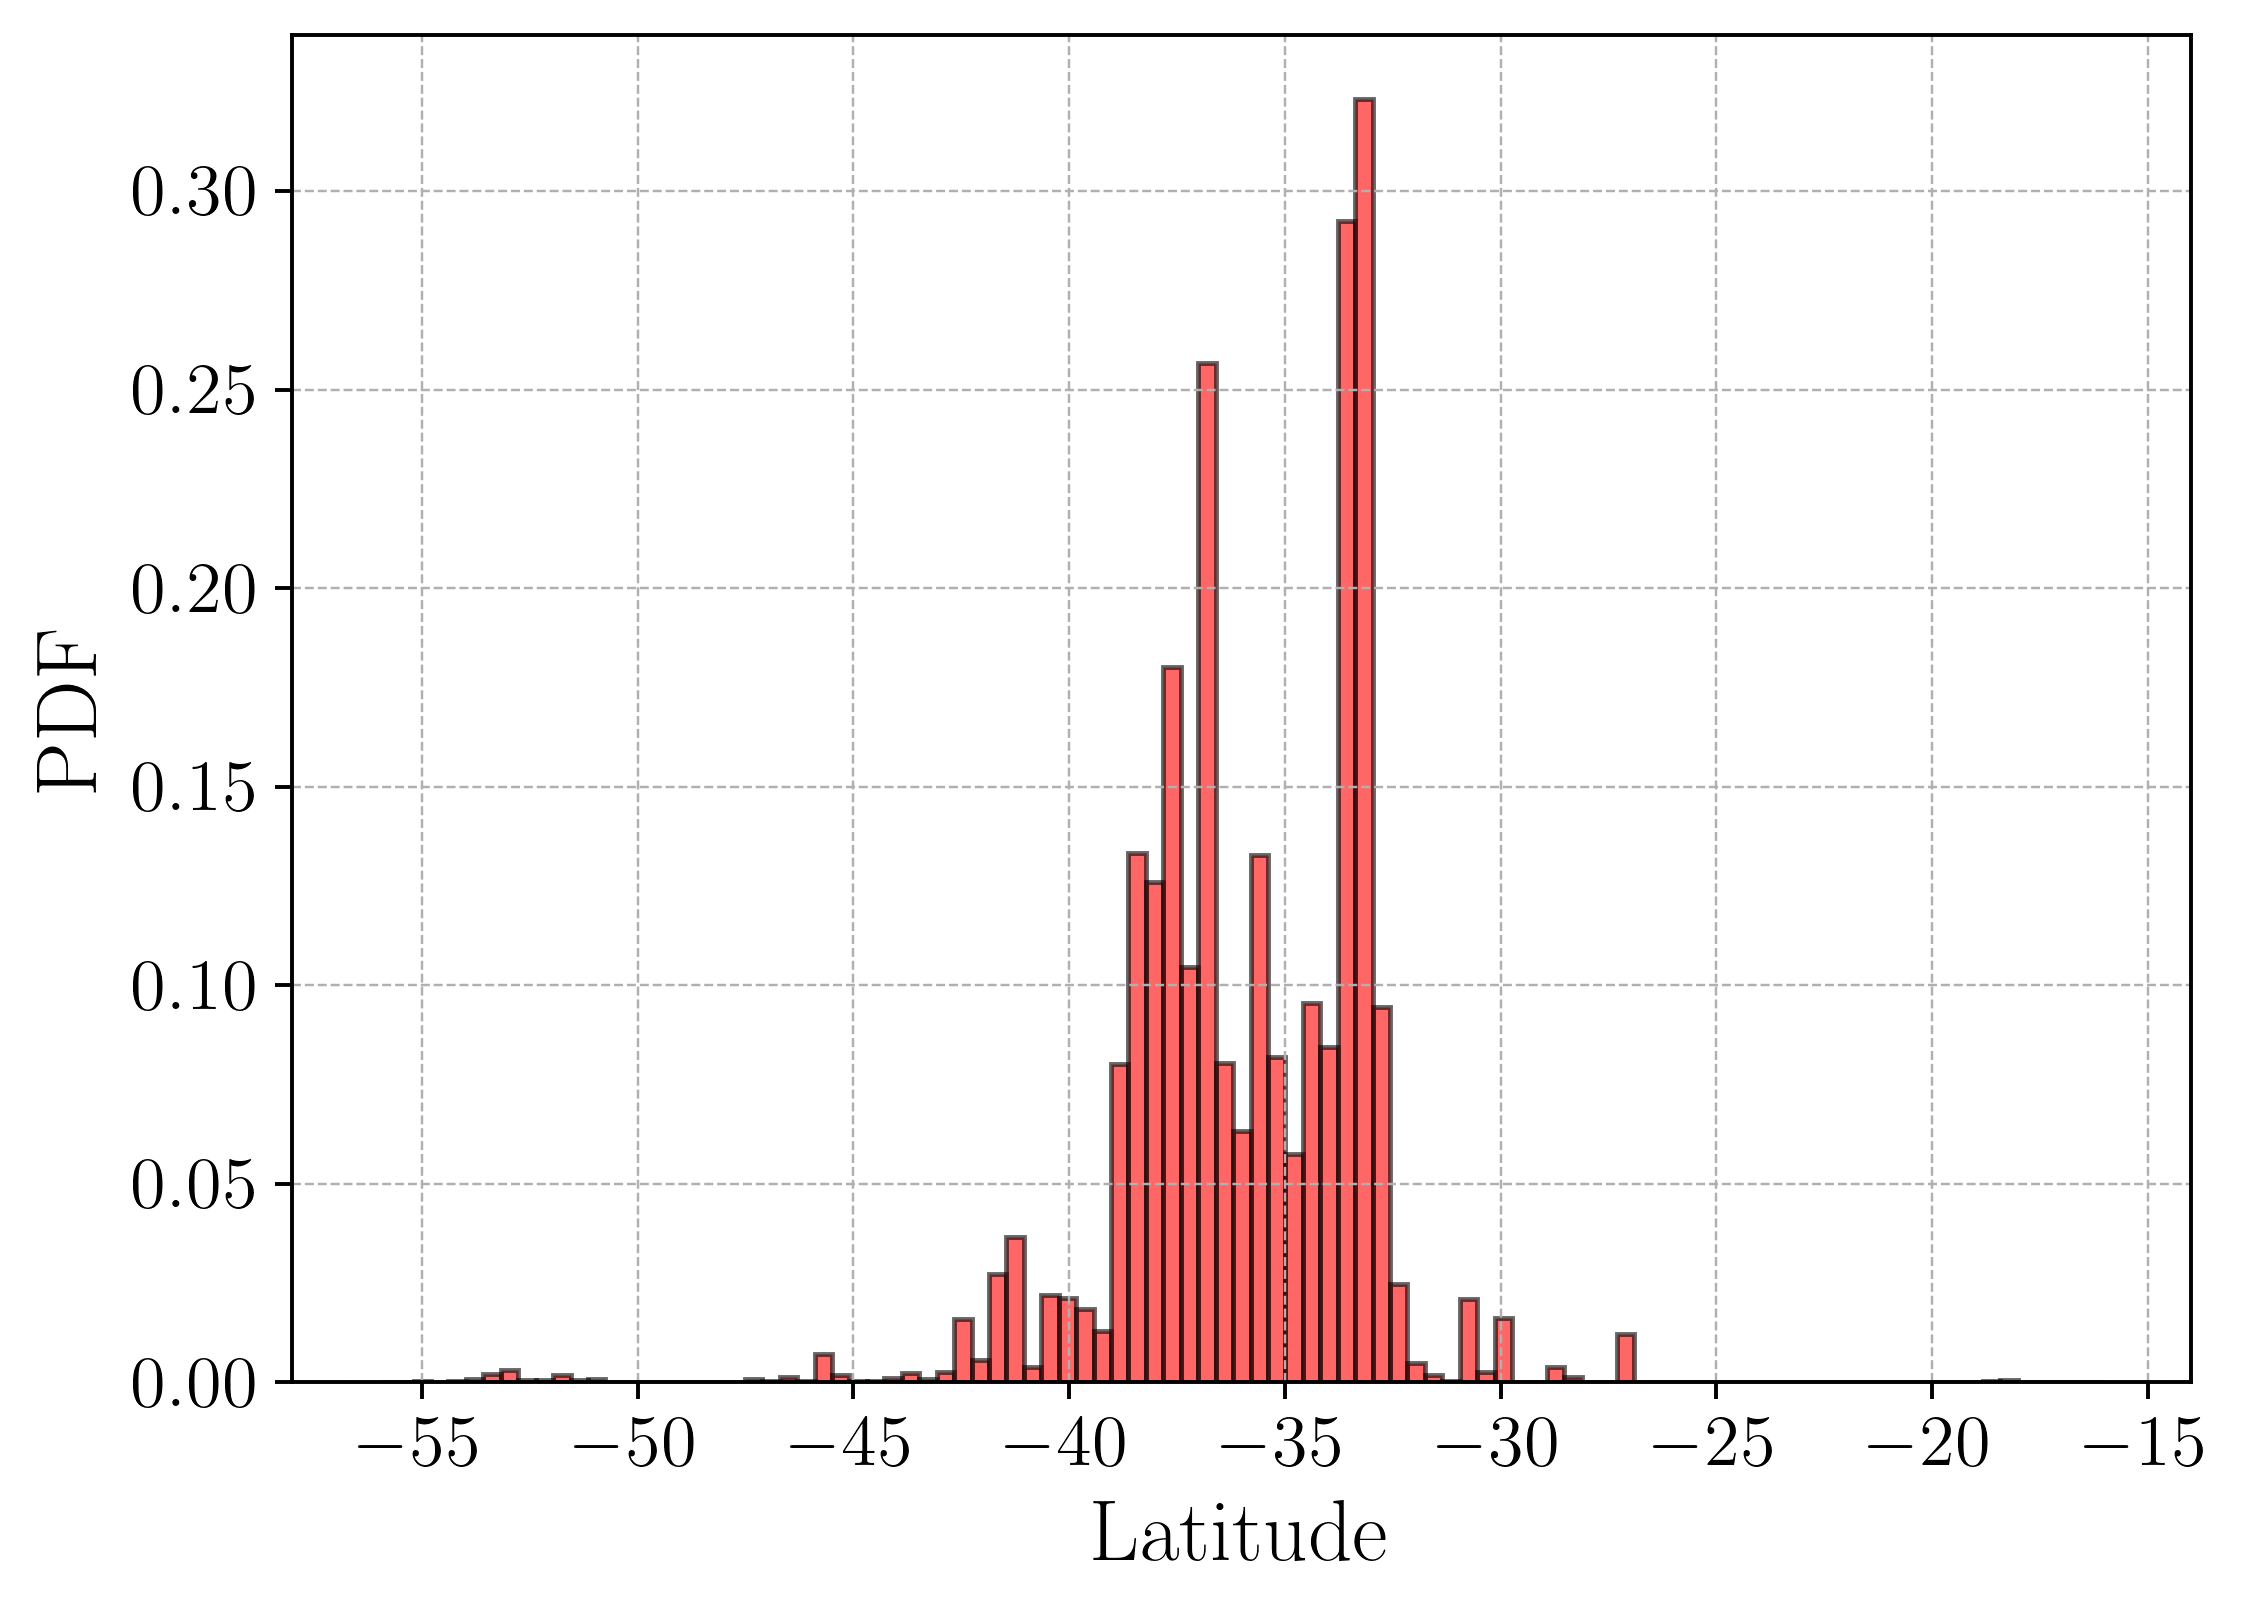

In [105]:
plt.figure(dpi=350, figsize=(7,5))


lat_bins = np.linspace(min_lat_chile, max_lat_chile, 100)
latitudes = df_chile.dLat

h, b = np.histogram(latitudes, bins=lat_bins, density=True)

plt.hist(latitudes, bins=lat_bins, density=True, alpha=0.6, color='red', edgecolor='black')

# X axis
plt.xlabel('Latitude', fontsize=18)
plt.xticks(size=15)
#plt.xscale('log')

# Y axis
plt.ylabel('PDF', fontsize=18)
plt.yticks(size=15)
#plt.yscale('log')

plt.grid(True, which="both", ls="--", linewidth=0.5)
#plt.legend(loc="upper right", fontsize=15)
plt.show()


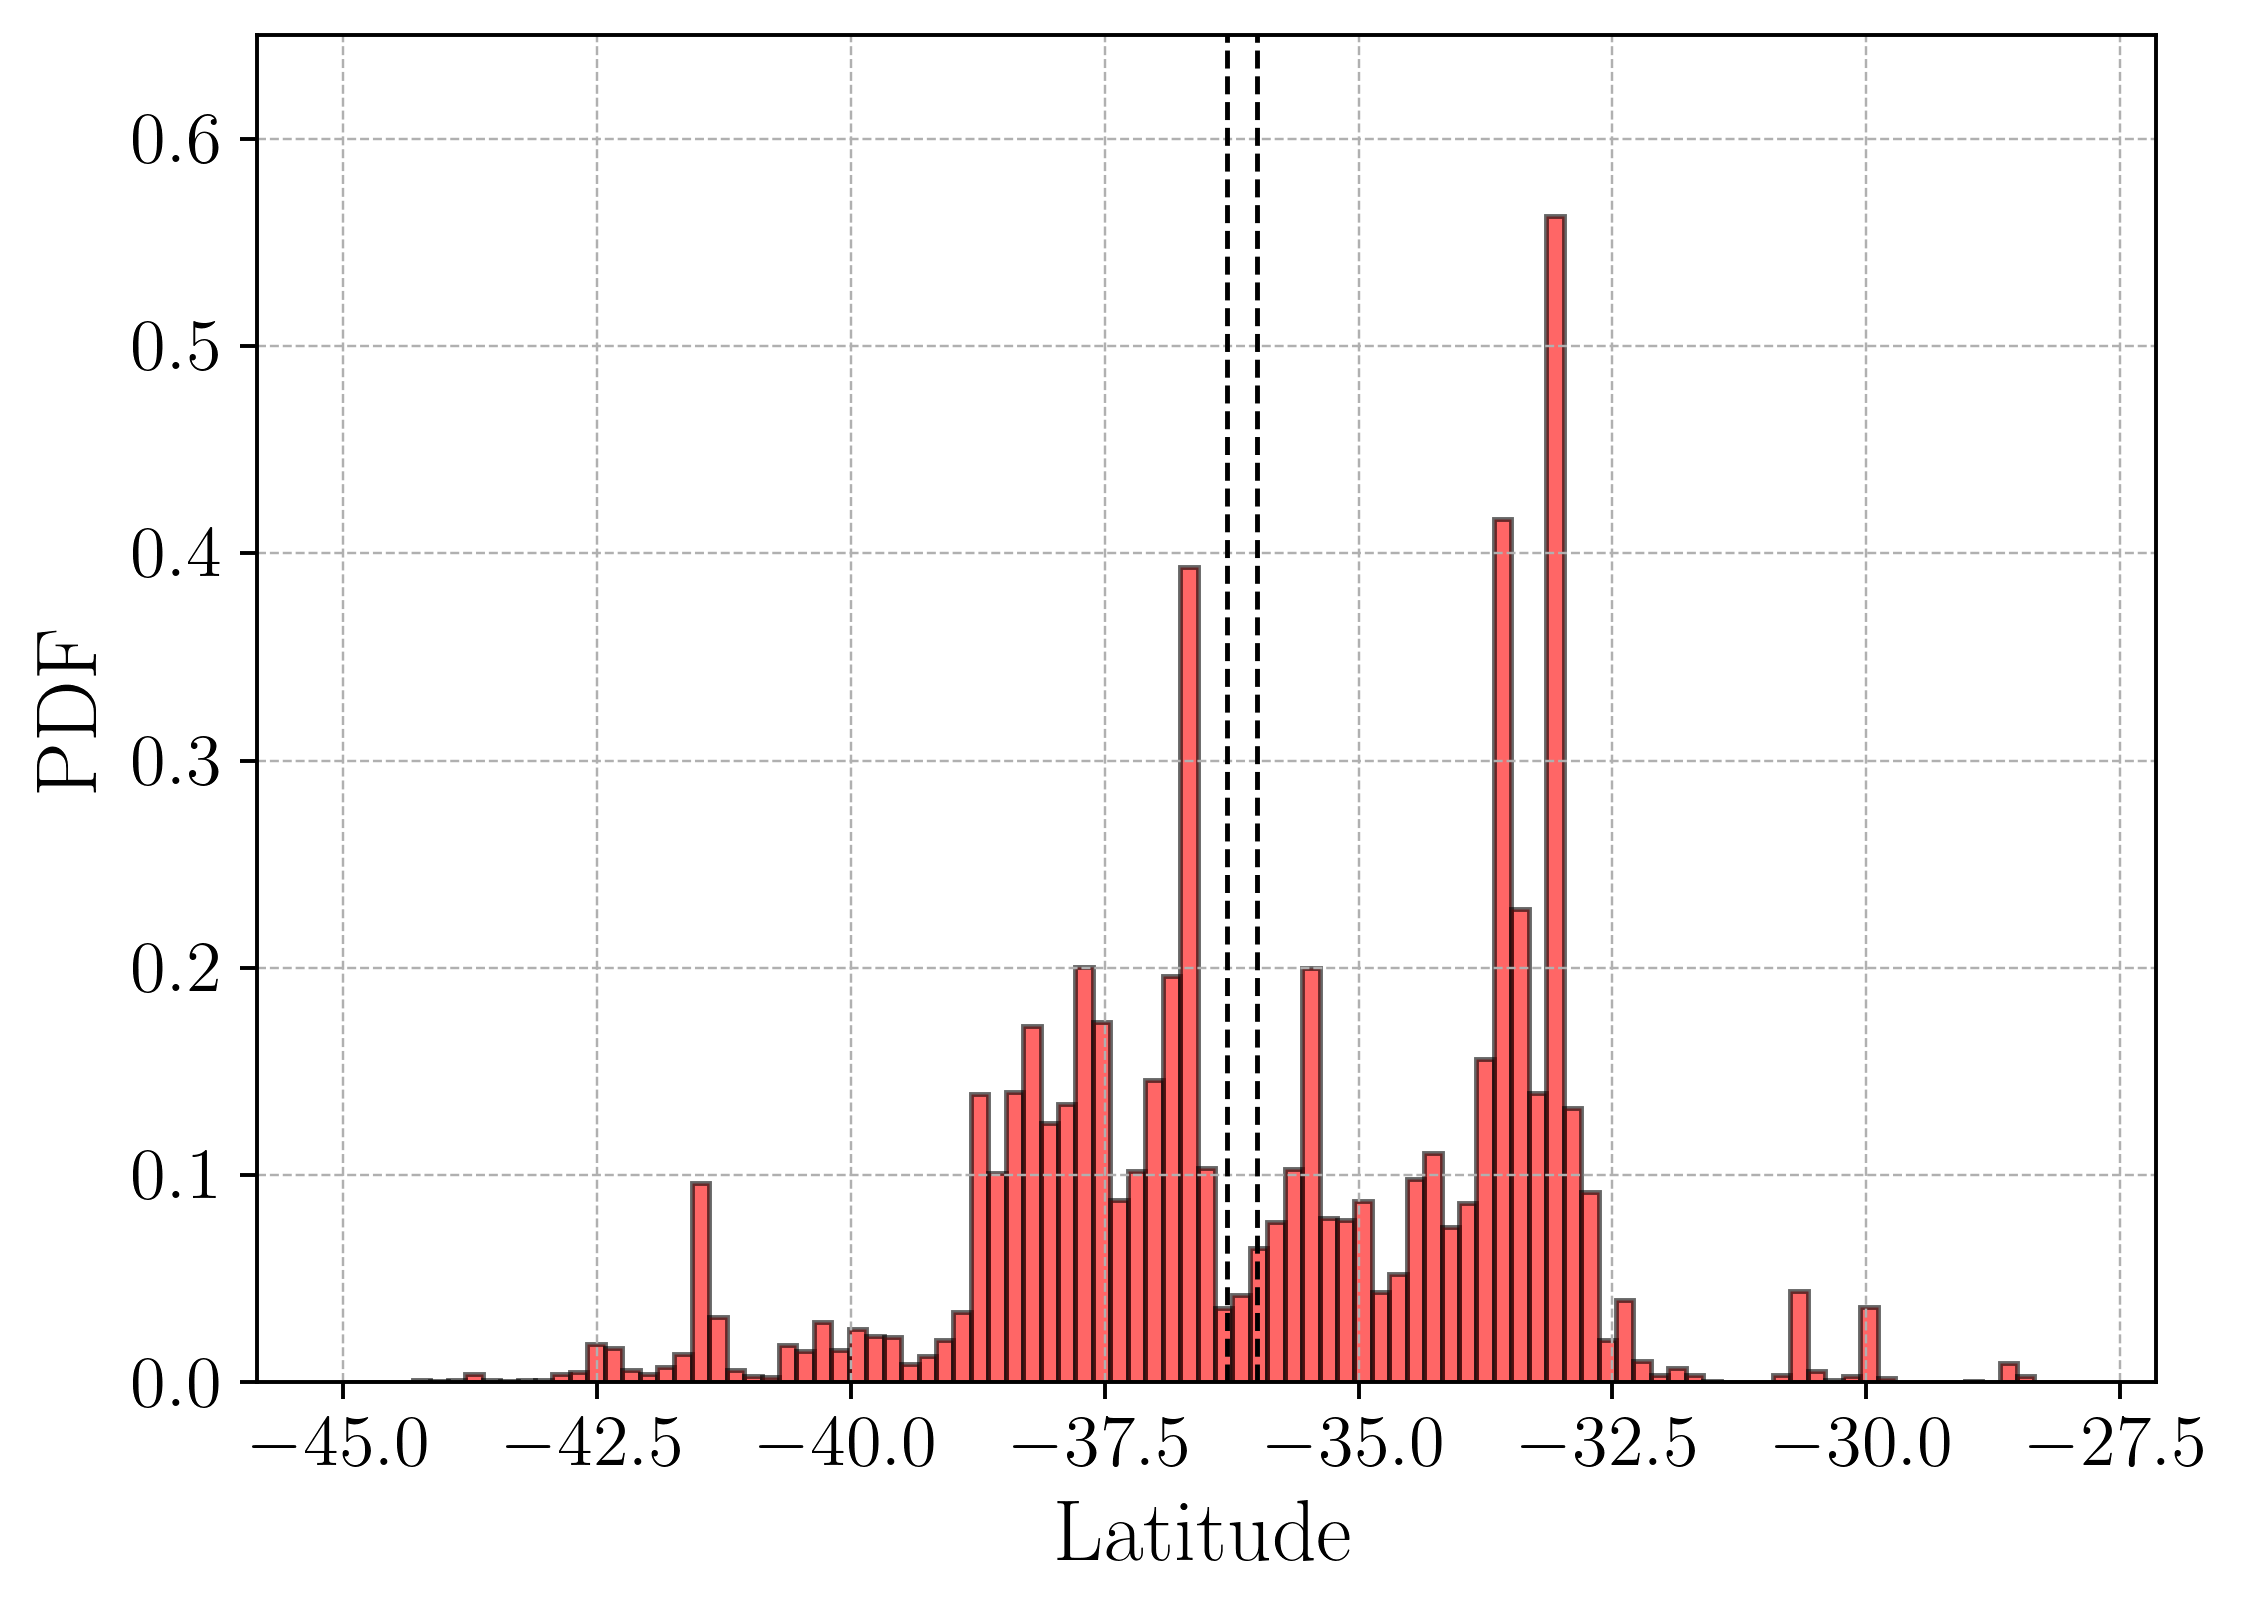

In [12]:
plt.figure(dpi=350, figsize=(7,5))


lat_bins = np.linspace(-45, -28, 100)
latitudes = df_chile.dLat

h, b = np.histogram(latitudes, bins=lat_bins, density=True)

plt.hist(latitudes, bins=lat_bins, density=True, alpha=0.6, color='red', edgecolor='black')
plt.plot([-36., -36.], [0, 0.8], color='black', linestyle="--", linewidth=1)
plt.plot([-36.3, -36.3], [0, 0.8], color='black', linestyle="--", linewidth=1)

# X axis
plt.xlabel('Latitude', fontsize=18)
plt.xticks(size=15)
#plt.xscale('log')

# Y axis
plt.ylabel('PDF', fontsize=18)
plt.yticks(size=15)
plt.ylim([0, 0.65])
#plt.yscale('log')

plt.grid(True, which="both", ls="--", linewidth=0.5)
#plt.legend(loc="upper right", fontsize=15)
plt.show()


In [6]:
df_centro = df_chile[(df_chile["dLat"] >= -36) & (df_chile["dLat"] < -28)]
df_sur = df_chile[(df_chile["dLat"] < -36.3) & (df_chile["dLat"] > -45)]

In [14]:
df_centro.shape[0], df_sur.shape[0]

(19849, 17408)

# AREA DISTRIBUTION CENTRO CHILE

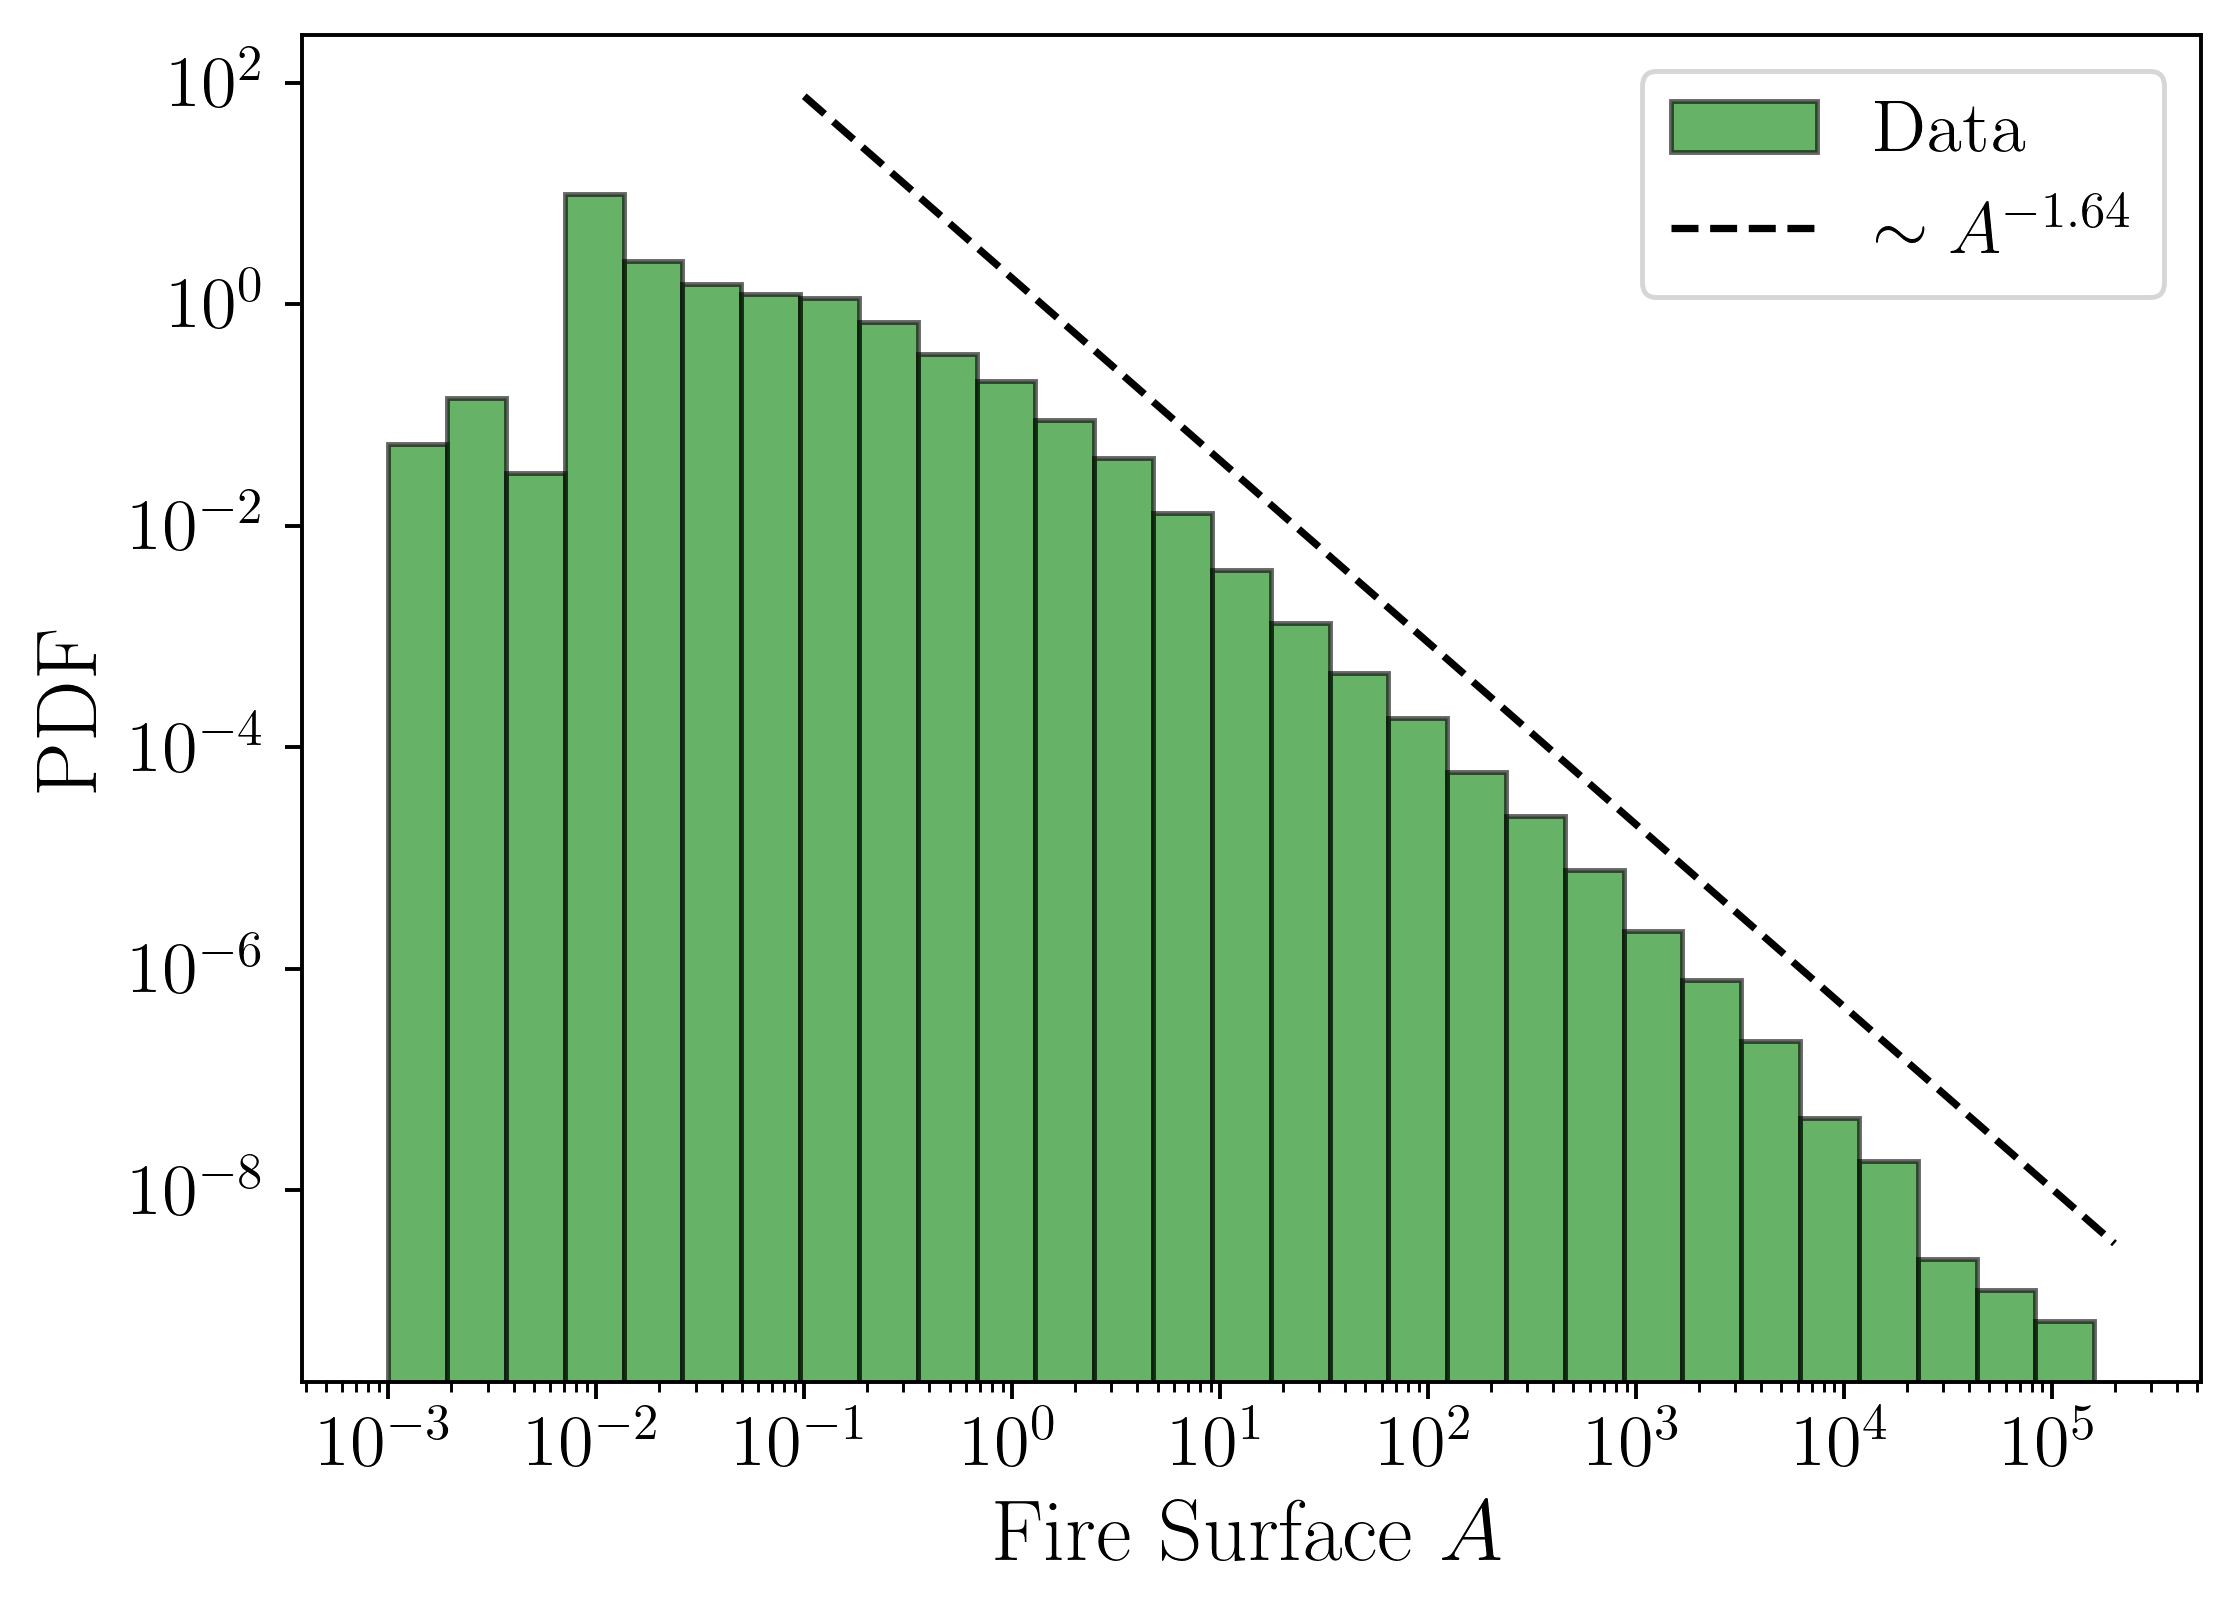

In [20]:
df_ = df_centro

surfaces = df_["Superficie total"]
min_val = surfaces.min()
max_val = surfaces.max()
bins = np.logspace(np.log10(min_val), np.log10(max_val), num=30)
h, b = np.histogram(surfaces, bins=bins, density=True)
x, y, params = XY_fit(b[17:-1], h[17:], x_range=[0.1, 2*1e5])

plt.figure(dpi=350, figsize=(7,5))

plt.hist(surfaces, bins=bins, density=True, alpha=0.6, color='g', edgecolor='black', label="Data")
plt.plot(x, y*10, "k--", label=fr"$\sim A^{{{round(params[-1],2)}}}$")

# X axis
plt.xlabel('Fire Surface $A$', fontsize=18)
plt.xticks(size=15)
plt.xscale('log')

# Y axis
plt.ylabel('PDF', fontsize=18)
plt.yticks(size=15)
plt.yscale('log')

#plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.legend(loc="upper right", fontsize=15)
plt.show()

# AREA DISTRIBUTION SUR CHILE

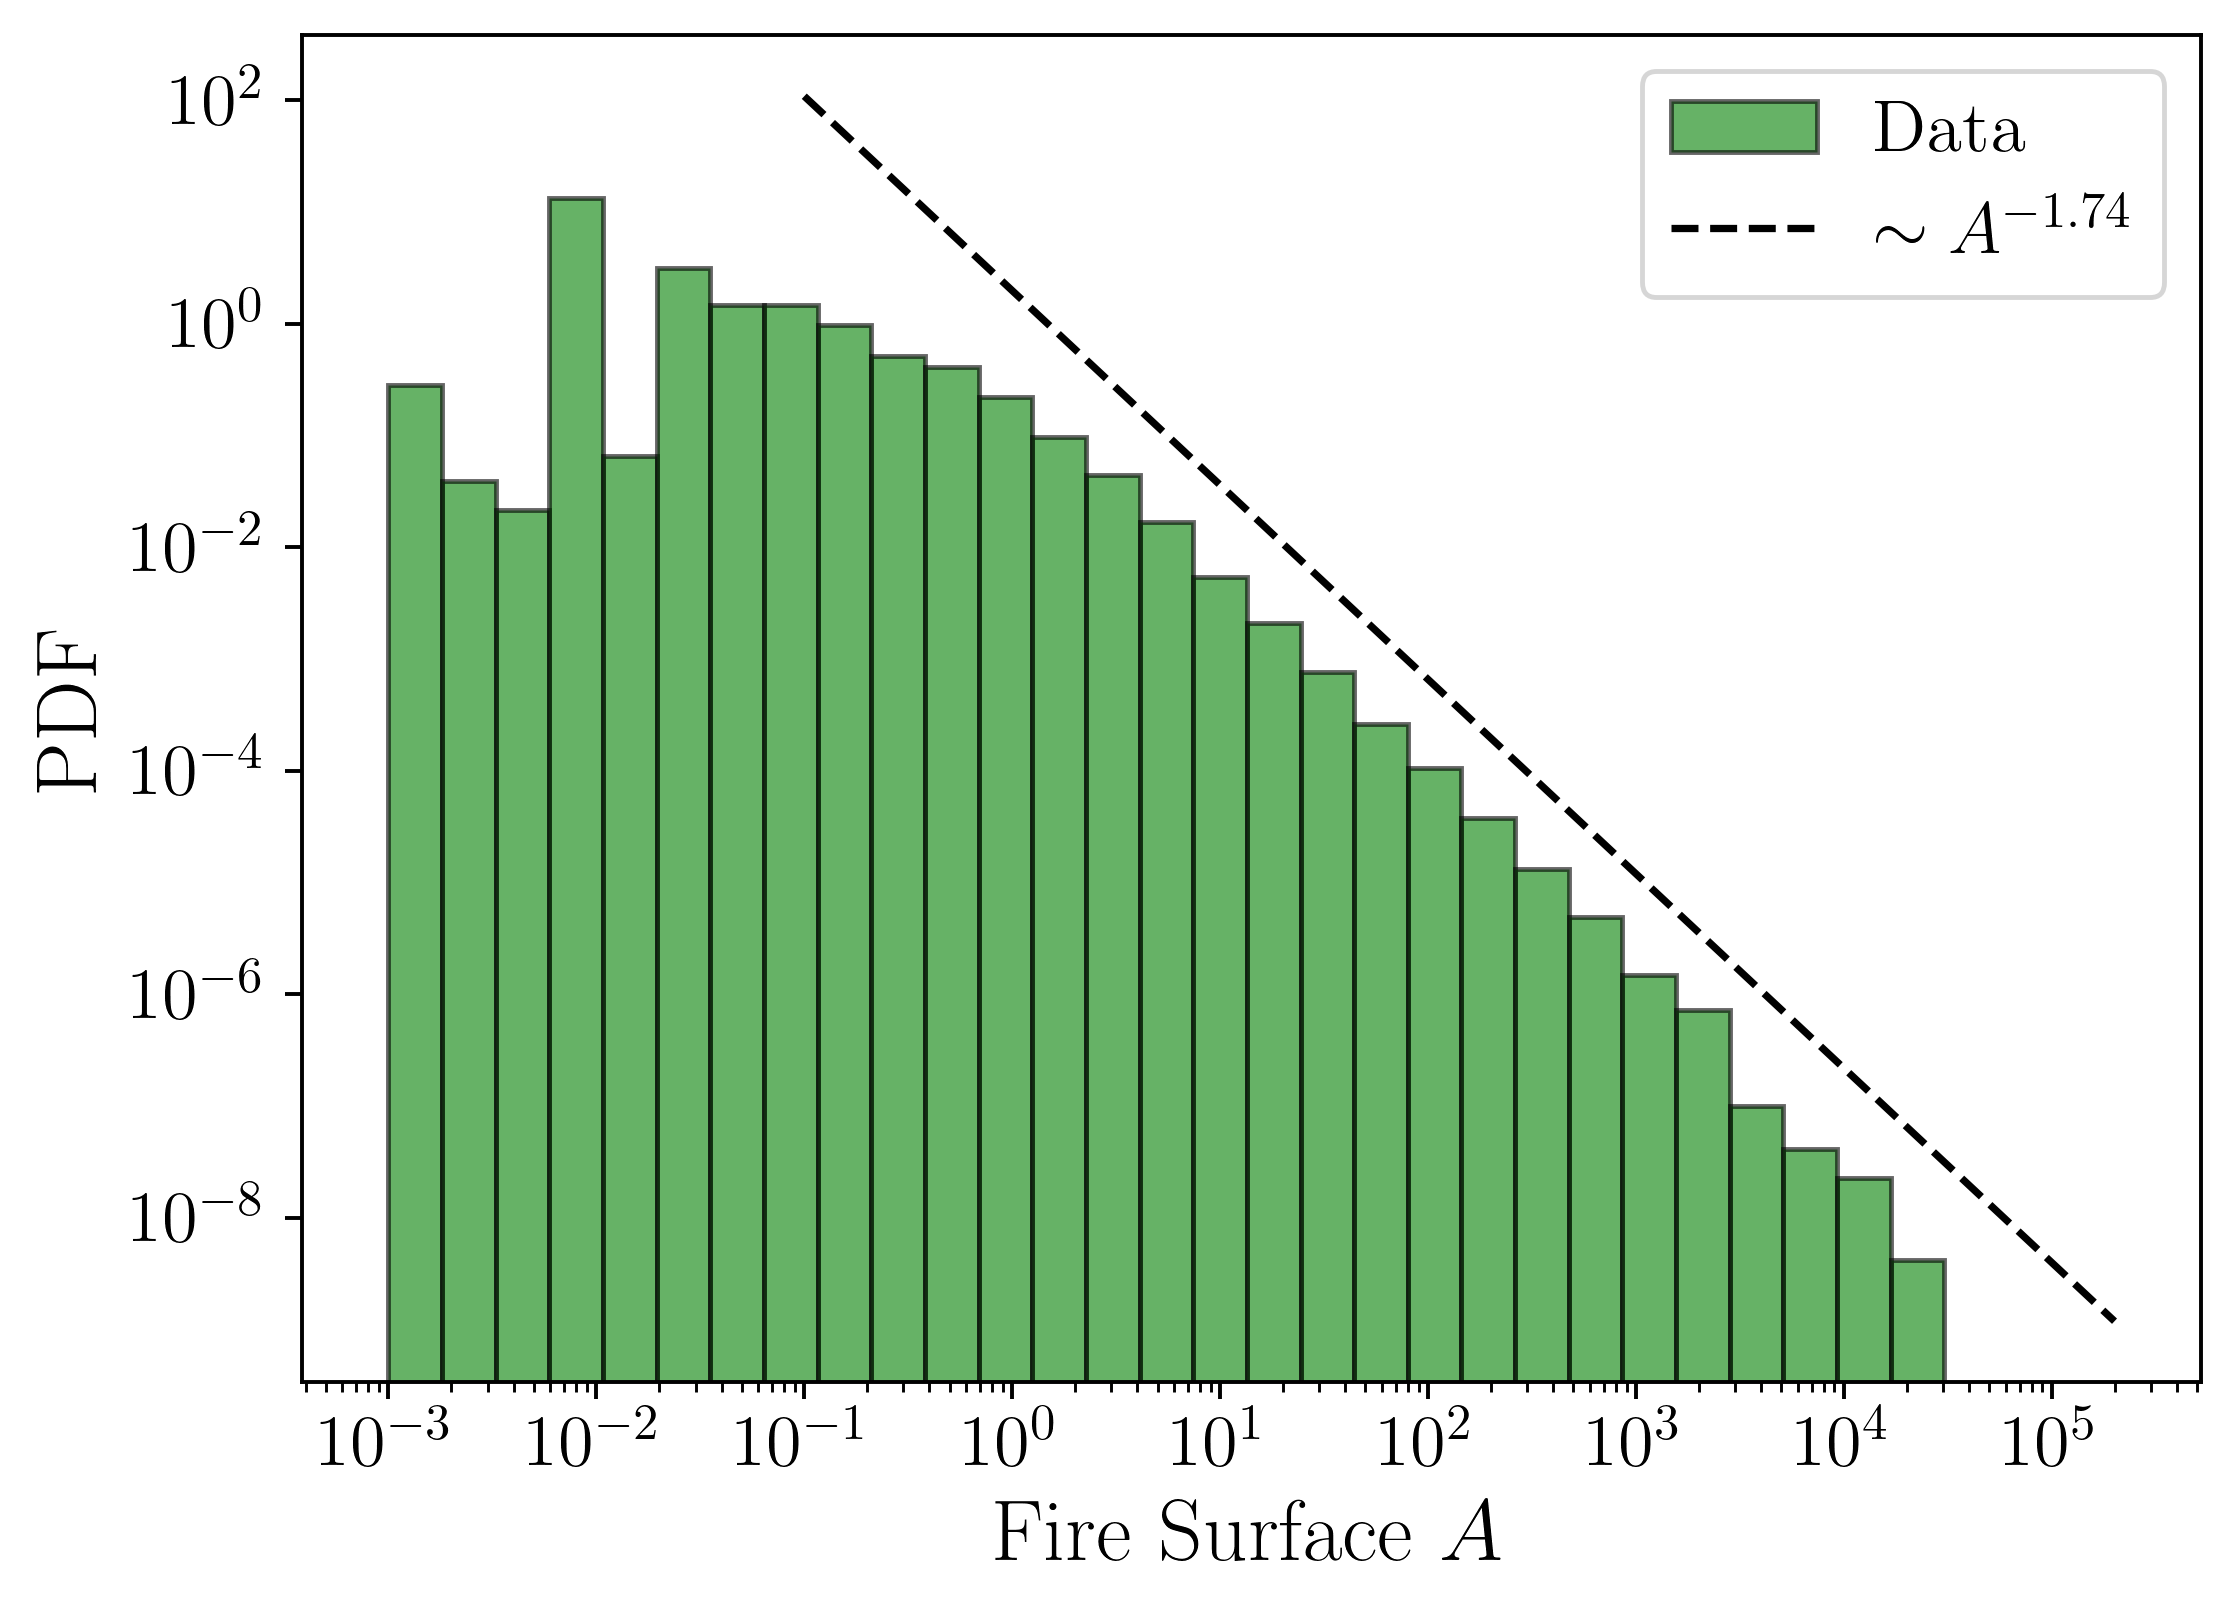

In [19]:
df_ = df_sur

surfaces = df_["Superficie total"]
min_val = surfaces.min()
max_val = surfaces.max()
bins = np.logspace(np.log10(min_val), np.log10(max_val), num=30)
h, b = np.histogram(surfaces, bins=bins, density=True)
x, y, params = XY_fit(b[17:-1], h[17:], x_range=[0.1, 2*1e5])


plt.figure(dpi=350, figsize=(7,5))

plt.hist(surfaces, bins=bins, density=True, alpha=0.6, color='g', edgecolor='black', label="Data")
plt.plot(x, y*10, "k--", label=fr"$\sim A^{{{round(params[-1],2)}}}$")

# X axis
plt.xlabel('Fire Surface $A$', fontsize=18)
plt.xticks(size=15)
plt.xscale('log')

# Y axis
plt.ylabel('PDF', fontsize=18)
plt.yticks(size=15)
plt.yscale('log')

#plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.legend(loc="upper right", fontsize=15)
plt.show()

# COMPLEXITY

In [7]:
df_sur["coordenadas"] = df_sur.apply(lambda x: lonlat_to_cartesian(x["dLat"], x["dLon"]), axis=1)

/tmp/ipykernel_246672/2755581239.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sur["coordenadas"] = df_sur.apply(lambda x: lonlat_to_cartesian(x["dLat"], x["dLon"]), axis=1)


In [8]:
C_q(df_sur["coordenadas"].tolist(), eps=10)

  0%|          | 0/17408 [00:00<?, ?it/s]

0.01645017698044071

In [10]:
D_q(df_sur["coordenadas"].tolist(), eps=1.2)

  0%|          | 0/17408 [00:00<?, ?it/s]

-36.74491175660611